<a href="https://colab.research.google.com/github/ruthika11/ipython-notebook-examples/blob/master/Ebola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questions**
**1**.Distinct # of Indicators in the universe (complete dataset).    
Output:
Integer

**2**.In the second half of the year 2015, how many countries have one or more “Cumulative number of confirmed Ebola cases”     
Output:
Integer value  

**3**.Top 10 total Ebola cases confirmed. Note that Indicator = Cumulative number of confirmed Ebola cases. Include rank based on the total value (=cases confirmed).         
Output:
country, total_value, rank

**4**.Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed probable and suspected Ebola deaths” in 2015 Q2 (i.e., April-June 2015).      
Output:
country, total_cases, rank

**5**.Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed probable and suspected Ebola deaths” with only even months of the year 2015 (i.e., months 2, 4, 6, 8, 10, 12).    
Output:
country, total_cases, rank

**6**.Find Country and Indicator wise total value. Also, rank on the total_value which is the sum at the Country-Indicator level.   
Output:
country, indicator, total_value, country_indicator_rank

**7**.For those Top 10 countries by Indicator = Cumulative number of confirmed Ebola cases, plot group bar chart.

X-axis -> Country   
Y-axis -> Bar 1 -> total_value with Indicator = Cumulative number of suspected Ebola cases    
Y-axis -> Bar 2 ->  total_value with Indicator = Cumulative number of confirmed Ebola cases

In [ ]:
import csv
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import datetime
from dateutil import parser
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive/")
import glob

In [ ]:
!ls - ltr /content/drive/MyDrive/

In [25]:
def pretty_print(df,n):
    print(tabulate(df.head(n), headers="keys", tablefmt = "psql"))

In [26]:
df = pd.read_csv(r"/content/drive/MyDrive/ebola_data_db_format.csv")

In [27]:
df["Date"] =df["Date"].astype(str)

In [28]:
def get_year(row):
  return datetime.datetime.strptime(row["Date"], "%Y-%m-%d").year
df["year"] = df.apply(get_year,axis = 1)

In [29]:
def get_month(row):
  return datetime.datetime.strptime(row["Date"], "%Y-%m-%d").month
df["month"] = df.apply(get_month,axis = 1)

In [30]:
def odd_even(row):
  return int(row["month"]%2)
df["odd_even"] = df.apply(odd_even,axis = 1)

In [31]:
pretty_print(df,3)

+----+--------------------------------------------------------------------+-----------+------------+---------+--------+---------+------------+
|    | Indicator                                                          | Country   | Date       |   value |   year |   month |   odd_even |
|----+--------------------------------------------------------------------+-----------+------------+---------+--------+---------+------------|
|  0 | Cumulative number of confirmed, probable and suspected Ebola cases | Guinea    | 2015-03-10 |    3285 |   2015 |       3 |          1 |
|  1 | Cumulative number of confirmed Ebola cases                         | Guinea    | 2015-03-10 |    2871 |   2015 |       3 |          1 |
|  2 | Cumulative number of probable Ebola cases                          | Guinea    | 2015-03-10 |     392 |   2015 |       3 |          1 |
+----+--------------------------------------------------------------------+-----------+------------+---------+--------+---------+------------+

# 1.Distinct # of Indicators in the universe (complete dataset).
Output: Integer

In [32]:
distinct_indicator = df["Indicator"].unique()
print(f"Distinct # of Indicators \n {len(distinct_indicator)}")

Distinct # of Indicators 
 36


# 2.In the second half of the year 2015, how many countries have one or more “Cumulative number of confirmed Ebola cases”
Output: Integer value

In [33]:
df_2015 = df.where(df["year"] == 2015)
df_2015 = df_2015.where(df_2015["Indicator"] == "Cumulative number of confirmed Ebola cases")\
   .groupby(["Country"]).size().to_frame("count").reset_index()
print(f"Number of countries: \n{len(df_2015)}")

Number of countries: 
11


# 3.Top 10 total Ebola cases confirmed. Note that Indicator = Cumulative number of confirmed Ebola cases. Include rank based on the total value (=cases confirmed).
Output: country, total_value, rank

In [34]:
top_10_cases = df.where(df["Indicator"] == "Cumulative number of confirmed Ebola cases")\
   .groupby(["Country"]).size().to_frame("total_value").reset_index()
top_10_cases = top_10_cases.sort_values(by = "total_value", ascending = False)
top_10_cases["rank"] = top_10_cases["total_value"].rank(ascending = False)
pretty_print(top_10_cases,10)

+----+--------------------------+---------------+--------+
|    | Country                  |   total_value |   rank |
|----+--------------------------+---------------+--------|
|  0 | Guinea                   |           259 |    1.5 |
|  8 | Sierra Leone             |           259 |    1.5 |
|  3 | Liberia                  |           258 |    3   |
|  6 | Nigeria                  |           255 |    4   |
|  7 | Senegal                  |           254 |    5   |
| 11 | United States of America |           245 |    6   |
|  5 | Mali                     |           243 |    7.5 |
|  9 | Spain                    |           243 |    7.5 |
| 10 | United Kingdom           |           221 |    9   |
|  2 | Italy                    |           141 |   10   |
+----+--------------------------+---------------+--------+


# 4.Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed probable and suspected Ebola deaths” in 2015 Q2 (i.e., April-June 2015).
Output: country, total_cases, rank

In [50]:
top_10_cases_2015 =df.where(df["year"] == 2015)
top_10_cases_2015 =top_10_cases_2015.where((top_10_cases_2015["month"] >= 3) & (top_10_cases_2015["month"] <= 6))

top_10_cases_2015 = top_10_cases_2015.where(top_10_cases_2015["Indicator"] == "Cumulative number of confirmed, probable and suspected Ebola cases")\
   .groupby(["Country"]).size().to_frame("total_cases").reset_index()

top_10_cases_2015 = top_10_cases_2015.sort_values(by = "total_cases", ascending = False)
top_10_cases_2015["rank"] = top_10_cases_2015["total_cases"].rank(ascending = False)
pretty_print(top_10_cases_2015,10)

+----+--------------------------+---------------+--------+
|    | Country                  |   total_cases |   rank |
|----+--------------------------+---------------+--------|
|  0 | Guinea                   |            75 |      5 |
|  2 | Liberia                  |            75 |      5 |
|  3 | Mali                     |            75 |      5 |
|  4 | Nigeria                  |            75 |      5 |
|  5 | Senegal                  |            75 |      5 |
|  6 | Sierra Leone             |            75 |      5 |
|  7 | Spain                    |            75 |      5 |
|  8 | United Kingdom           |            75 |      5 |
|  9 | United States of America |            75 |      5 |
|  1 | Italy                    |            34 |     10 |
+----+--------------------------+---------------+--------+


# 5.Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed probable and suspected Ebola deaths” with only even months of the year 2015 (i.e., months 2, 4, 6, 8, 10, 12).
Output: country, total_cases, rank

In [52]:
top_10_even = df.where(df["year"] == 2015)
top_10_even = top_10_even.where(top_10_even['odd_even'] == 0)
print(top_10_even)
top_10_even = top_10_even.where(top_10_even["Indicator"] == "Cumulative number of confirmed probable and suspected Ebola deaths")\
   .groupby(["Country"]).size().to_frame("total_cases").reset_index()

top_10_even = top_10_even.sort_values(by = "total_cases", ascending = False)
top_10_even["rank"] = top_10_even["total_cases"].rank(ascending = False)
pretty_print(top_10_even,10)

      Indicator Country Date  value  year  month  odd_even
0           NaN     NaN  NaN    NaN   NaN    NaN       NaN
1           NaN     NaN  NaN    NaN   NaN    NaN       NaN
2           NaN     NaN  NaN    NaN   NaN    NaN       NaN
3           NaN     NaN  NaN    NaN   NaN    NaN       NaN
4           NaN     NaN  NaN    NaN   NaN    NaN       NaN
...         ...     ...  ...    ...   ...    ...       ...
17580       NaN     NaN  NaN    NaN   NaN    NaN       NaN
17581       NaN     NaN  NaN    NaN   NaN    NaN       NaN
17582       NaN     NaN  NaN    NaN   NaN    NaN       NaN
17583       NaN     NaN  NaN    NaN   NaN    NaN       NaN
17584       NaN     NaN  NaN    NaN   NaN    NaN       NaN

[17585 rows x 7 columns]
+-----------+---------------+--------+
| Country   | total_cases   | rank   |
|-----------+---------------+--------|
+-----------+---------------+--------+


# 6.Find Country and Indicator wise total value. Also, rank on the total_value which is the sum at the Country-Indicator level.
Output: country, indicator, total_value, country_indicator_rank

In [54]:
country_indicator = df.groupby(["Country","Indicator"]).size().to_frame("total_value").reset_index()
country_indicator["country_indicator_rank"] = country_indicator["total_value"].rank(ascending = False)
pretty_print(country_indicator, 10)

+----+-----------+---------------------------------------------------------------------------+---------------+--------------------------+
|    | Country   | Indicator                                                                 |   total_value |   country_indicator_rank |
|----+-----------+---------------------------------------------------------------------------+---------------+--------------------------|
|  0 | Guinea    | Case fatality rate (CFR) of confirmed Ebola cases                         |             4 |                    127   |
|  1 | Guinea    | Case fatality rate (CFR) of confirmed, probable and suspected Ebola cases |             4 |                    127   |
|  2 | Guinea    | Case fatality rate (CFR) of probable Ebola cases                          |             4 |                    127   |
|  3 | Guinea    | Case fatality rate (CFR) of suspected Ebola cases                         |             4 |                    127   |
|  4 | Guinea    | Cumulative numb

# 7.For those Top 10 countries by Indicator = Cumulative number of confirmed Ebola cases, plot group bar chart.

X-axis -> Country   
Y-axis -> Bar 1 -> total_value with Indicator = Cumulative number of suspected Ebola cases    
Y-axis -> Bar 2 -> total_value with Indicator = Cumulative number of confirmed Ebola cases  

In [38]:
sus_case = df.where(df["Indicator"] == "Cumulative number of suspected Ebola cases")\
         .groupby("Country").size().to_frame("total_value").reset_index()
sus_case = sus_case.sort_values(by = "total_value", ascending = False)
sus_case["rank"] = sus_case["total_value"].rank(ascending = False)
pretty_print(sus_case,10)

+----+--------------------------+---------------+--------+
|    | Country                  |   total_value |   rank |
|----+--------------------------+---------------+--------|
|  0 | Guinea                   |           259 |    1.5 |
|  8 | Sierra Leone             |           259 |    1.5 |
|  3 | Liberia                  |           258 |    3   |
|  6 | Nigeria                  |           255 |    4   |
|  7 | Senegal                  |           253 |    5   |
|  5 | Mali                     |           242 |    6   |
|  9 | Spain                    |           238 |    7.5 |
| 11 | United States of America |           238 |    7.5 |
| 10 | United Kingdom           |           221 |    9   |
|  2 | Italy                    |           141 |   10   |
+----+--------------------------+---------------+--------+


In [55]:
con_case = df.where(df["Indicator"] == "Cumulative number of suspected Ebola cases")\
         .groupby("Country").size().to_frame("total_value").reset_index()
con_case = con_case.sort_values(by = "total_value", ascending = False)
con_case["rank"] = con_case["total_value"].rank(ascending = False)
pretty_print(con_case,10)

+----+--------------------------+---------------+--------+
|    | Country                  |   total_value |   rank |
|----+--------------------------+---------------+--------|
|  0 | Guinea                   |           259 |    1.5 |
|  8 | Sierra Leone             |           259 |    1.5 |
|  3 | Liberia                  |           258 |    3   |
|  6 | Nigeria                  |           255 |    4   |
|  7 | Senegal                  |           253 |    5   |
|  5 | Mali                     |           242 |    6   |
|  9 | Spain                    |           238 |    7.5 |
| 11 | United States of America |           238 |    7.5 |
| 10 | United Kingdom           |           221 |    9   |
|  2 | Italy                    |           141 |   10   |
+----+--------------------------+---------------+--------+


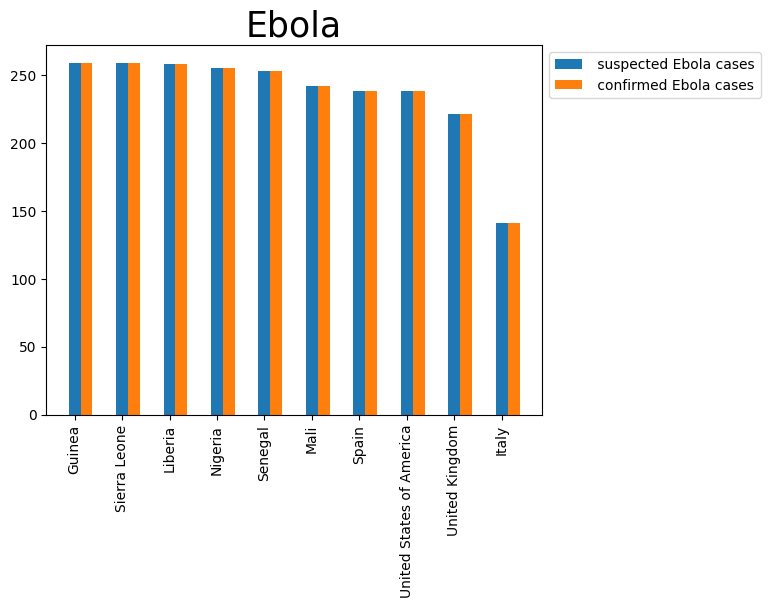

In [48]:
n = 10
suspected = list(sus_case["total_value"])[0:n]
confirmed = list(con_case["total_value"])[0:n]
country = list(sus_case["Country"])[0:n]
x = np.arange(n)
width = 0.25

plt.title("Ebola",size = 25)
plt.bar(x,suspected,width,label = " suspected Ebola cases")
plt.bar(x + width,confirmed,width,label = " confirmed Ebola cases")

plt.xticks(x,country, rotation = 90)
plt.legend(loc = "best", bbox_to_anchor = (1,1))
plt.show()